# Python Assignment

_Brittany Cavazos_ 

**Instructions**:
Carefully annotate and execute the code already provided in `sequence_translate.py`. If you're unfamiliar with a bit of code, you can find lots of resources and information online. Be sure to cite information appropriately (by providing URLs and other relevant references). You must also write the missing code that is outlined by pseudocode and comments. Remember to document everything very clearly!

#### Your Mission -*should you choose to accept it* 🕵️‍-  Complete Python code in a Jupyter Notebook

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

The code above is importing SeqIO, a CodonTable and pandas (which we are shortening to pd). SeqIO, part of Biopython, is the standard sequence Input/output interface. It allows the user to be able to read sequence file formats. CodonTable panwill translate the sequences. Pandas is a software library that is commonly used for manipulating data and performing operations.(https://biopython.org/wiki/SeqIO)

## *Functions*

[Your descriptions of all functions should contain information about what the function does, as well as information about the return types and arguments.]

### Function 1: Dr. X's dictionary function

Directions: *Document Dr. X's function with comments and with markdown text in your Jupyter notebook.*

In [2]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

* the `def` command is defining a function that we are calling `get_sequences_from file` 
* in the second line, we are putting the output of this function in an object called `sequence_data_dict`
* in the third line, `for record in SeqIO.parse(fasta_fn, "fasta"):`, we are telling python to read our file, fasta_fn, as a fasta file, and parse takes the file handle and format name and returns the SeqRecord iterator (https://biopython.org/wiki/SeqRecord)

In [3]:
# Using bears_cytb.fasta as an example... let's first view this data, using SeqIO.parse()
# from Bio import SeqIO # we ran this earlier
for record in SeqIO.parse("bears_cytb.fasta", "fasta"):
    print(record)
print(type(record))

ID: AF264047.1
Name: AF264047.1
Description: AF264047.1 Ursus spelaeus cytochrome b gene, complete cds; mitochondrial gene for mitochondrial product
Number of features: 0
Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA', SingleLetterAlphabet())
ID: AB020907.1
Name: AB020907.1
Description: AB020907.1 Ursus arctos mitochondrial gene for cytochrome b, complete cds
Number of features: 0
Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet())
ID: AB360958.1
Name: AB360958.1
Description: AB360958.1 Ursus thibetanus mitochondrial cytb gene for cytochrome b, complete cds, haplotype: Cb-C1
Number of features: 0
Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA', SingleLetterAlphabet())
ID: U23562.1
Name: U23562.1
Description: U23562.1 Melursus ursinus cytochrome b gene, mitochondrial gene encoding mitochondrial protein, isolate URUR2, complete cds
Number of features: 0
Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCAC

Based on this output, we can see that this is a Bio.SeqRecord and the data is broken up into Id, Name, Description, Number of features, and Sequence. 

Describing Function 1 cont'd:

* the fourth line in the function, `description = record.description.split()`,  is making an object that is taking the description output in the file and separating the string by the spaces
* the fifth line, `species_name = description[1] + " " + description[2]`, is getting the species name, which is putting together the second element, (indexed as [1]) and the third element (indexed as [2]) and separating them by a space, resulting in the whole genus-species name
* the sixth line, ` sequence_data_dict[species_name] = record.seq`, `species_name` is put into `sequence_data_dict`, so the return output is a dictionary with the species name as the key and the sequences (record.seq) as the value

In [4]:
# test function on bears_cytb.fasta file #
get_sequences_from_file("bears_cytb.fasta")

{'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA', SingleLetterAlphabet()),
 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA', SingleLetterAlphabet()),
 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA', SingleLetterAlphabet()),
 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...A

In [5]:
# following dictionary format from class just to make sure it checks out #
d = get_sequences_from_file("bears_cytb.fasta")
for key, value in d.items():
    print(key, value)

Ursus spelaeus ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTTATTGACCTCCCAACACCATCAAACATCTCAGCATGATGAAACTTTGGATCCCTCCTCGGAGTATGCTTAATTCTACAGATCCTAACAGGCCTGTTTCTAGCTATACACTACACATCAGACACAACCACAGCCTTTTCATCAATCACCCATATTTGCCGAGACGTTCACTACGGTTGAGTTATCCGATATATACATGCAAACGGAGCCTCCATATTCTTTATCTGTCTATTCATGCACGTAGGACGGGGCCTATACTATGGCTCATACCTATTCTCAGAAACATGAAACATTGGCATTATTCTCCTACTTACAGTCATAGCCACCGCATTCATAGGATATGTCCTACCCTGAGGCCAAATGTCCTTCTGAGGAGCAACTGTCATTACCAACCTACTATCGGCCATTCCCTATATCGGAACGGACCTAGTAGAATGAATCTGAGGAGGCTTTTCCGTAGATAAGGCAACTCTAACACGATTCTTTGCCTTCCACTTTATCCTCCCGTTCATCATCTTAGCACTAGCAGCAGTCCATCTATTGTTTCTACACGAAACAGGATCCAACAACCCCTCTGGAATCCCATCTGACTCAGACAAAATCCCATTTCACCCATACTATACAATTAAGGACATTCTAGGCGCCCTGCTTCTCACTCTAGCTTTAGCAGCTCTAGTCCTATTCTCGCCTGACTTACTAGGAGACCCTGACAACTATACCCCCGCAAACCCACTGAGTACCCCACCCCACATCAAACCCGAGTGGTACTTTCTATTTGCCTACGCTATCCTACGATTTATCCCTAACAAACTAGGAGGAGTACTAGCACTAATCTTCTCCATTCTAATCCTAGCTATCATTTCTCTTCTACACACATCCAAACAACGAGGAATGATATTCCGGCCTCTAAGCCAATGCCTATTCTGACTCCTAG

Yay! It worked 🥂

***

### Function 2: manual translation function

Directions: *Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.*

(All sequences start at codon position 1; Complete a function that translates using a loop over the string of nucleotides)

In [6]:
## Here is  some pseudo-code and suggestions

# def translate_function(string_nucleotides): 
#     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
#     for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
#         # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
#         # this is how you can retrieve the amino acid: mito_table.forward_table[codon]
#         add the aa to aa_seq_string
#     return(aa_seq_string)

In [7]:
# Here is my completed function:

def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] 
    aa_seq_string = []
    for i in range(0,len(string_nucleotides), 3):
        codon = string_nucleotides[i:i+3]
        if codon != 'TAA' and codon != 'TAG' and codon != 'AGA' and codon!= 'AGG':
            aa = mito_table.forward_table[codon]
            aa_seq_string.append(aa)
    return "".join(aa_seq_string)

In [8]:
# testing to see if it works:
translate_function(record.seq) # this is from the bears file


C:\Users\britt\Anaconda3\lib\site-packages\Bio\Seq.py:163: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  "the new string hashing behaviour.", BiopythonWarning)


'MTNIRKTHPLAKIINNSFIDLPTPSNISAWWNFGSLLGVCLILQILTGLFLAMHYTSDTTTAFSSVTHICRDVHYGWVIRYVHANGASMFFICLFMHVGRGLYYGSYLFSETWNIGIILLFTVMATAFMGYVLPWGQMSFWGATVITNLLSAIPYIGTDLVEWIWGGFSVDKATLTRFFAFHFILPFIILALAAVHLLFLHETGSNNPSGIPSDSDKIPFHPYYTIKDILGALLLTLALATLVLFSPDLLGDPDNYIPANPLSTPPHIKPEWYFLFAYAILRSIPNKLGGVLALIFSILILALIPLLHTSKQRGMMFRPLSQCLFWLLVADLLTLTWIGGQPVEHPFIIIGQLASILYFTILLVLMPIAGIIENNLLKW'

Explanation of the tranlate function below:

* l1, we are using `def` to define a function called `translate_function`and inside we will put a string of nucleotides (our data)
* l2, we are creating an object called mito_table, which is taken from CondonTable in Biopython and it is specifically the vertebrate mitochondrial table, or table 2 (shown separately below). 

In [9]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] 
print(mito_table)
# describing the table
print(type(mito_table))
print(dir(mito_table))

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

* l3 creates an empty list that the amino acids will go in (I make this back into a string at the end)
* l4 is the beginning of the for loop-
>     for i in range(0,len(string_nucleotides), 3):
        codon = string_nucleotides[i:i+3]
    This part uses the function `range`, and I'm having it start at 0, stop at the length of our data, and I set the steps at three to get every third nucleotide. Below that, I am creating an object called codon that is indexing the string of nucleotides from an arbitrary i, to two spaces after that `i+3`, so we have all three to translate into an aa. 
* after that, I have to take out the stop codons, because python was yelling out me and they wouldn't translate 
>if codon != 'TAA' and codon != 'TAG' and codon != 'AGA' and codon!= 'AGG':
            aa = mito_table.forward_table[codon]
            aa_seq_string.append(aa)
I used an if statement (sry, probably cringeworthy syntax 🤷‍♀️) and I used `!=` as and 'is not' statement and went through all four stop codons - so if the codon coming from the earlier code was none of those, it was then put into the `mito_table.forward_table` where it was translated into an amino acid. There was probably a nicer way to do this that I did not spend time figuring out.
* After that, I used `.append` to add on each newly translated amino acid to my `aa_seq_string` list (.append is only for lists and cannot be used for strings
* To make the returned output back into a string, I used `"".join()`, which is a solution I found on multiple help sites online like https://www.geeksforgeeks.org/join-function-python/

***

### Function 3: BioPython translation function

Directions: *Write an alternative translation function.*

As an alternative, we can just use the `.translate()` that comes included in BioPython

In [10]:
print(record.seq.translate(table = 2, to_stop = True)) # the to_stop leaves out the stop codons annotated by '*'
# table two is the same as the vertebrate mitochondrial table we are calling earlier

MTNIRKTHPLAKIINNSFIDLPTPSNISAWWNFGSLLGVCLILQILTGLFLAMHYTSDTTTAFSSVTHICRDVHYGWVIRYVHANGASMFFICLFMHVGRGLYYGSYLFSETWNIGIILLFTVMATAFMGYVLPWGQMSFWGATVITNLLSAIPYIGTDLVEWIWGGFSVDKATLTRFFAFHFILPFIILALAAVHLLFLHETGSNNPSGIPSDSDKIPFHPYYTIKDILGALLLTLALATLVLFSPDLLGDPDNYIPANPLSTPPHIKPEWYFLFAYAILRSIPNKLGGVLALIFSILILALIPLLHTSKQRGMMFRPLSQCLFWLLVADLLTLTWIGGQPVEHPFIIIGQLASILYFTILLVLMPIAGIIENNLLKW


***

### Function 4: Molecular weight function

Directions: *Write a function that calculates the molecular weight of each amino acid sequence [http://biopython.org/wiki/ProtParam].*

In [11]:
## So you should import the following before defining your function:
# from Bio.SeqUtils.ProtParam import ProteinAnalysis
# def compute_molecular_weight(aa_seq):
#     # I think the ProtParam functions may require aa_seq to be a string.
#     # It may not work if the amino acid sequence has stop codons.
#     run the ProteinAnalysis() function on aa_seq
#	  return the molecular weight

In [12]:
test = translate_function(record.seq) # this is from our manual translate function because the output is a str
print(type(test))

# this gives you the weight of all the amino acids... but our function needs to calculate the weight of each amino acid
from Bio.SeqUtils.ProtParam import ProteinAnalysis
analysed_seq = ProteinAnalysis(test) # this test was generated using the first by-hand function bc it needs to be a string
analysed_seq.molecular_weight()

<class 'str'>


C:\Users\britt\Anaconda3\lib\site-packages\Bio\Seq.py:163: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  "the new string hashing behaviour.", BiopythonWarning)


42454.78729999998

In [13]:
# completed molecular weight function:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
def compute_molecular_weight(aa_seq):
    all_mlclr_wt = []
    for i in aa_seq:
        analysed_seq = ProteinAnalysis(i)
        mlclr_wt = analysed_seq.molecular_weight()
        all_mlclr_wt.append(mlclr_wt)
    return all_mlclr_wt

compute_molecular_weight(test) # just to make sure it worked (sorry output is in a list)

[149.2113,
 119.1192,
 132.1179,
 131.1729,
 174.201,
 146.1876,
 119.1192,
 155.1546,
 115.1305,
 131.1729,
 89.0932,
 146.1876,
 131.1729,
 131.1729,
 132.1179,
 132.1179,
 105.0926,
 165.1891,
 131.1729,
 133.1027,
 131.1729,
 115.1305,
 119.1192,
 115.1305,
 105.0926,
 132.1179,
 131.1729,
 105.0926,
 89.0932,
 204.2252,
 204.2252,
 132.1179,
 165.1891,
 75.0666,
 105.0926,
 131.1729,
 131.1729,
 75.0666,
 117.1463,
 121.1582,
 131.1729,
 131.1729,
 131.1729,
 146.1445,
 131.1729,
 131.1729,
 119.1192,
 75.0666,
 131.1729,
 165.1891,
 131.1729,
 89.0932,
 149.2113,
 155.1546,
 181.1885,
 119.1192,
 105.0926,
 133.1027,
 119.1192,
 119.1192,
 119.1192,
 89.0932,
 165.1891,
 105.0926,
 105.0926,
 117.1463,
 119.1192,
 155.1546,
 131.1729,
 121.1582,
 174.201,
 133.1027,
 117.1463,
 155.1546,
 181.1885,
 75.0666,
 204.2252,
 117.1463,
 131.1729,
 174.201,
 181.1885,
 117.1463,
 155.1546,
 89.0932,
 132.1179,
 75.0666,
 89.0932,
 105.0926,
 149.2113,
 165.1891,
 165.1891,
 131.1729,
 1

* In the beginning we are using `def`, like before, do define a function called `compute_molecular weight` that will be applied to our data (here called aa_seq)
* `all_mlclr_wt = []` is creating an empty list for final weights to go in
* the next part of code is our for loop:
> for i in aa_seq:
        analysed_seq = ProteinAnalysis(i) 
        mlclr_wt = analysed_seq.molecular_weight() 
        all_mlclr_wt.append(mlclr_wt)
>This iterates through each amino acid and 1) performs the `ProteinAnalysis` function, and the output is stored in `analysed_seq`. 2) it then uses the tool `.molecular_weight()` to get the weight of each amino acid from `analysed_seq`. 3) We are then filling the liste we created earlier called `all_mlclr_weight` with each molecular weight above by using the `.append` tool. Finally, we are returning the list of all molecular weights at the end.


***

### For Function 5: GC-content function

Directions: *Write a function that computes the GC-content of each DNA sequence.*

In [14]:
# GC content function:

def gc_content(dna_seq):
    gc_count = 0
    for base in dna_seq:
        if base is 'G' or base is 'C':
            gc_count +=1        
    return gc_count/len(dna_seq)
        
gc_content(record.seq)      

0.44298245614035087

* Like in the previous functions, we are using `def` to define a function. This time the function is called `gc_content` and we are using it on our dna_seq data. 
* we start by initiating an counter starting at zero that will keep track of all g's and c's
* next we loop through each base in our sequence and if the base is a G or C, the counter will go up by one. 
* the function ends by returning the total gc count divided by the total length of the dna sequence, or total nucleotides, which is equal to the proportion of GC in the sequence

## *Main*

In [15]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") # this is a dictionary

bears_df = pd.read_csv("bears_mass.csv") # Includes only data for body mass 

species_list = list(bears_df.species) 

#### 6. Add two new columns to the bears DataFrame, and set the value to 'NaN' to indicate that these cells are currently empty: 
 1. molecular weight 
 2. content

In [16]:
print(bears_df) # before
bears_df['molecular_weight'] = 'NaN'
bears_df['content'] = 'NaN'
print(bears_df) # after -- just to make sure it works

                  species     mass
0          Ursus spelaeus  550.800
1            Ursus arctos  203.500
2        Ursus thibetanus   99.714
3        Melursus ursinus  100.030
4        Ursus americanus  110.560
5     Helarctos malayanus   47.020
6  Ailuropoda melanoleuca  118.200
7      Tremarctos ornatus  140.700
8         Ursus maritimus  425.100
                  species     mass molecular_weight content
0          Ursus spelaeus  550.800              NaN     NaN
1            Ursus arctos  203.500              NaN     NaN
2        Ursus thibetanus   99.714              NaN     NaN
3        Melursus ursinus  100.030              NaN     NaN
4        Ursus americanus  110.560              NaN     NaN
5     Helarctos malayanus   47.020              NaN     NaN
6  Ailuropoda melanoleuca  118.200              NaN     NaN
7      Tremarctos ornatus  140.700              NaN     NaN
8         Ursus maritimus  425.100              NaN     NaN


#### 7. Call your functions from step 3 (or step 2) and step 4 and fill in the new columns in the DataFrame.
* Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to DataFrame

In [17]:
for index, row in bears_df.iterrows():
   # print(index, row['content'])
    seq = cytb_seqs[bears_df.loc[index, 'species']]
    aa_seq = translate_function(seq) #2 
    cmw = sum(compute_molecular_weight(aa_seq))
    gcc = gc_content(seq)
  # print(index,cmw, gcc)
    bears_df.loc[index,'content'] = gcc
    bears_df.loc[index,'molecular_weight'] = cmw
print(bears_df)

C:\Users\britt\Anaconda3\lib\site-packages\Bio\Seq.py:163: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  "the new string hashing behaviour.", BiopythonWarning)


                  species     mass molecular_weight   content
0          Ursus spelaeus  550.800          49268.6  0.437719
1            Ursus arctos  203.500          49224.5  0.437719
2        Ursus thibetanus   99.714          49116.5   0.45614
3        Melursus ursinus  100.030          49361.8  0.451754
4        Ursus americanus  110.560          49237.5  0.439474
5     Helarctos malayanus   47.020          49370.7  0.442982
6  Ailuropoda melanoleuca  118.200            49512  0.407895
7      Tremarctos ornatus  140.700          49194.6   0.44386
8         Ursus maritimus  425.100          49264.6  0.442982


* There was probably a better way to do this but I started with a loop that went through the each index and row of bears_df using iterrows
* I used `.loc`, so by giving it the index and species in bears, the output will give you the sequence of each row 
* Once I had the seqence this way, I translated it using the first translate function, because the output of this was was a string
* Then I calculated the molecular weight with my compute_molecular weight function-- only that spat out of list of each amino acid weight for a species so I summed to get the total. 
* The last calculation was the gc content - so I used the gc_content function made earlier on the sequence
* after having both weight and gc content, I put them into the dataframe using .loc[index, 'new column name'] = column output created in loop
* and then at the end I printed the data frame to see if it worked


#### 8. Plot a bar-chart of the mass with the x-axes labeled with species names.
1. What is the largest bear species?
2. What else is interesting about this species?

In [18]:
# importing plotting libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
%matplotlib inline

In [20]:
#^has to be in a separate chunk

bears_df # just to remember what it looks like...

,species,mass,molecular_weight,content
0,Ursus spelaeus,550.800,49268.6,0.437719
1,Ursus arctos,203.500,49224.5,0.437719
2,Ursus thibetanus,99.714,49116.5,0.45614
3,Melursus ursinus,100.030,49361.8,0.451754
4,Ursus americanus,110.560,49237.5,0.439474
5,Helarctos malayanus,47.020,49370.7,0.442982
6,Ailuropoda melanoleuca,118.200,49512,0.407895
7,Tremarctos ornatus,140.700,49194.6,0.44386
8,Ursus maritimus,425.100,49264.6,0.442982


[Text(0,0,'Ursus spelaeus'),
 Text(0,0,'Ursus arctos'),
 Text(0,0,'Ursus thibetanus'),
 Text(0,0,'Melursus ursinus'),
 Text(0,0,'Ursus americanus'),
 Text(0,0,'Helarctos malayanus'),
 Text(0,0,'Ailuropoda melanoleuca'),
 Text(0,0,'Tremarctos ornatus'),
 Text(0,0,'Ursus maritimus')]

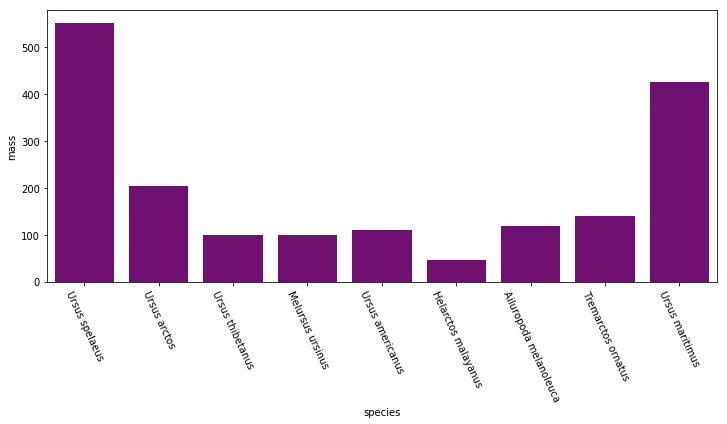

In [21]:
plot_dims = (12, 5) # i messed around with this until it looked ok and not too crowded
fig, ax = plt.subplots(figsize = plot_dims)
sns.barplot("species", "mass", data=bears_df, color = 'purple') # using .barplot in seaborn
ax.set_xticklabels(bears_df['species'], rotation=-65) # adjusting the angle of axis labels for readability

<BarContainer object of 9 artists>

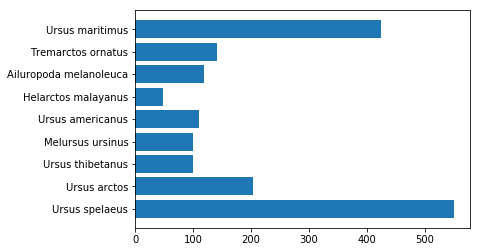

In [22]:
plt.barh("species", "mass", data = bears_df) #horizontal version, another way to plot using .barh (h for horizontal)

The largest bear species is *Ursus spelaeus*, or a cave bear which is 💀 **extinct** 💀 . It over 2x bigger than all other bears except the polar bear.   

#### 9. Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

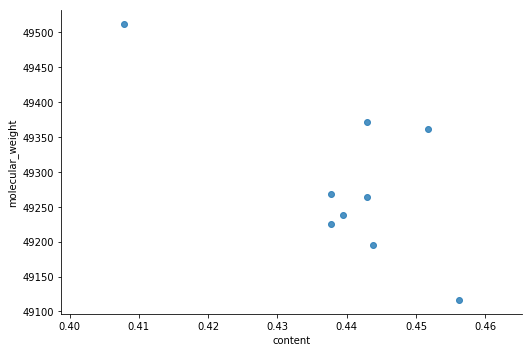

In [23]:
sns.lmplot("content", "molecular_weight", data=bears_df, fit_reg=False, aspect = 1.5)

# Here I'm using .lmplot in the seaborn library plotting content on the x and molecular weight on the y. 
# aspect is 1.5 to make it a bit bigger and we are setting fir_reg to false so there isn't a line drawn through it.

#### 10. Save (write) the new DataFrame that includes your new columns to a file called "bears_mass_cytb.csv"

In [24]:
bears_df.to_csv("bears_mass_cytb.csv", sep = '\t')

^here I'm writing it using `.to_csv` which is part of pandas and it will save to my current directory with the name "bears_mass_cytb.csv" and we are using tabs as delimiters.

#### 11 - BONUS: What else can we do with this dataset in Python? 🐻
* Add functions or anything that might be interesting and fun. (optional)
 (0.5 additional points if your total score is < 15).

In [25]:
bears_df 

,species,mass,molecular_weight,content
0,Ursus spelaeus,550.800,49268.6,0.437719
1,Ursus arctos,203.500,49224.5,0.437719
2,Ursus thibetanus,99.714,49116.5,0.45614
3,Melursus ursinus,100.030,49361.8,0.451754
4,Ursus americanus,110.560,49237.5,0.439474
5,Helarctos malayanus,47.020,49370.7,0.442982
6,Ailuropoda melanoleuca,118.200,49512,0.407895
7,Tremarctos ornatus,140.700,49194.6,0.44386
8,Ursus maritimus,425.100,49264.6,0.442982


Let's make a pie 🥧 📈 (for 💩 and 😆)

objectively one of the worst ways to visualize data

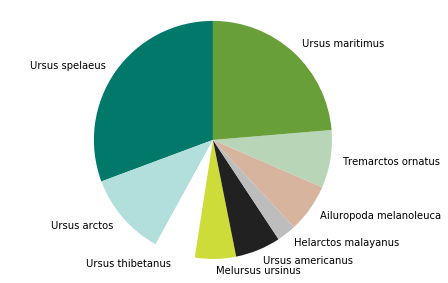

In [26]:
labels = bears_df['species']
sizes = bears_df['mass']
colors = ['#00796B', '#B2DFDB', '#FFFFFF', '#CDDC39', '#212121', '#BDBDBD', '#D7B49E', '#B8D5B8', '#689F38'] 
plt.pie(sizes, labels = labels, colors=colors, shadow=False, startangle=90)
#plt.legend(patches, labels, loc="upper left")
plt.axis('equal')
plt.tight_layout()
plt.show()

# SO PRETTY 🤣🤢

Okay... let's try plotting something else

In [27]:
list(bears_df['species'])

['Ursus spelaeus',
 'Ursus arctos',
 'Ursus thibetanus',
 'Melursus ursinus',
 'Ursus americanus',
 'Helarctos malayanus',
 'Ailuropoda melanoleuca',
 'Tremarctos ornatus',
 'Ursus maritimus']

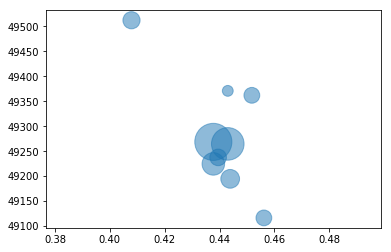

In [28]:
import numpy as np
 
x = bears_df['content']
y = bears_df['molecular_weight']
bears = list(bears_df['species'])
# use the scatter function
fig, ax = plt.subplots()
ax.scatter(x, y, s=bears_df['mass']*2.5, alpha=0.5, marker = "o")

# Here I am scaling the size of the data point by how big the bear is. Nothing too interesting here. 
# Tried my hardest to get .annotate to label the points with the species names but I couldn't figure it out.

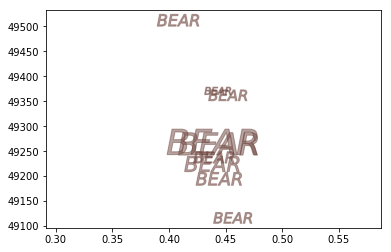

In [29]:
# OR...

# BEARS
x = bears_df['content']
y = bears_df['molecular_weight']
 
# use the scatter function
plt.scatter(x, y, s=bears_df['mass']*15, alpha=0.5, marker = "$BEAR$", color = '#6F4740')
plt.show()

# pointless 